# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create DF
df = pd.DataFrame(data={"City": cities})
df["Cloudiness"] = ""
df["Country"] = ""
df["Date"] = ""
df["Humidity"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Wind Speed"] = ""
df.head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,,,,,,,,
1,atuona,,,,,,,,
2,san patricio,,,,,,,,
3,katsuura,,,,,,,,
4,lagoa,,,,,,,,
5,tuatapere,,,,,,,,
6,weligama,,,,,,,,
7,meyungs,,,,,,,,
8,norman wells,,,,,,,,
9,carnarvon,,,,,,,,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:

x=1
print("Beginning Data Retrieval")
print("---------------------")
for index, row in df.iterrows():
    dfcity = row["City"]
    url = base_url + "appid=" + weather_api_key + "&q=" + dfcity + "&units=imperial"
    response = requests.get(url).json()
    try:
        print(f"Processing Record {x} | {dfcity}")
        x += 1
        df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        df.loc[index, "Country"] = response["sys"]["country"]
        df.loc[index, "Date"] = time.asctime(time.gmtime(response["dt"]))
        df.loc[index, "Humidity"] = response["main"]["humidity"]
        df.loc[index, "Lat"] = response["coord"]["lat"]
        df.loc[index, "Lng"] = response["coord"]["lon"]
        df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    except (NameError, KeyError):
        print("City not found. Skipping...")
        
print("---------------------")
print("Data Retrieval Complete")
print("---------------------")

Beginning Data Retrieval
---------------------
Processing Record 1 | punta arenas
Processing Record 2 | atuona
Processing Record 3 | san patricio
Processing Record 4 | katsuura
Processing Record 5 | lagoa
Processing Record 6 | tuatapere
Processing Record 7 | weligama
Processing Record 8 | meyungs
City not found. Skipping...
Processing Record 9 | norman wells
Processing Record 10 | carnarvon
Processing Record 11 | bambous virieux
Processing Record 12 | lima
Processing Record 13 | san joaquin
Processing Record 14 | taolanaro
City not found. Skipping...
Processing Record 15 | candolim
Processing Record 16 | mataura
Processing Record 17 | amderma
City not found. Skipping...
Processing Record 18 | georgetown
Processing Record 19 | avarua
Processing Record 20 | port elizabeth
Processing Record 21 | hofn
Processing Record 22 | doksy
Processing Record 23 | mircea voda
Processing Record 24 | mys shmidta
City not found. Skipping...
Processing Record 25 | belushya guba
City not found. Skipping...

Processing Record 231 | slave lake
Processing Record 232 | ruidoso
Processing Record 233 | coquimbo
Processing Record 234 | talas
Processing Record 235 | yulara
Processing Record 236 | talnakh
Processing Record 237 | marcona
City not found. Skipping...
Processing Record 238 | tarime
Processing Record 239 | muros
Processing Record 240 | khonuu
City not found. Skipping...
Processing Record 241 | kalinovskaya
Processing Record 242 | maceio
Processing Record 243 | codrington
Processing Record 244 | leningradskiy
Processing Record 245 | grand river south east
City not found. Skipping...
Processing Record 246 | great yarmouth
Processing Record 247 | kiunga
Processing Record 248 | souillac
Processing Record 249 | bilibino
Processing Record 250 | horasan
Processing Record 251 | comodoro rivadavia
Processing Record 252 | tapaua
City not found. Skipping...
Processing Record 253 | tambopata
Processing Record 254 | esso
Processing Record 255 | tsihombe
City not found. Skipping...
Processing Record

Processing Record 458 | hailar
Processing Record 459 | rawson
Processing Record 460 | srednekolymsk
Processing Record 461 | conde
Processing Record 462 | faya
Processing Record 463 | saint-augustin
Processing Record 464 | cockburn town
Processing Record 465 | shushtar
Processing Record 466 | beruni
City not found. Skipping...
Processing Record 467 | hearst
Processing Record 468 | serdobsk
Processing Record 469 | peace river
Processing Record 470 | matagami
Processing Record 471 | namibe
Processing Record 472 | sorvag
City not found. Skipping...
Processing Record 473 | marystown
Processing Record 474 | balykshi
City not found. Skipping...
Processing Record 475 | sicamous
Processing Record 476 | juneau
Processing Record 477 | alamosa
Processing Record 478 | los llanos de aridane
Processing Record 479 | phangnga
Processing Record 480 | stepnogorsk
Processing Record 481 | zemio
Processing Record 482 | jiaocheng
Processing Record 483 | red bluff
Processing Record 484 | vanimo
Processing Rec

In [17]:
# cities = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# # Set variable for output file
# output_file = os.path.join('..', 'output_data', 'cities.csv')
# #  Open the output file
# with open(output_file, 'w') as datafile:
#     weather_data.to_csv(output_data_file)
df.count()
df.head()
df = df[df.Date != ""]
df.reset_index(inplace=True, drop=True)
df.head(10)
# Output File (CSV)
output_data_file = "../output_data/cities.csv"
df.to_csv(output_data_file, encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

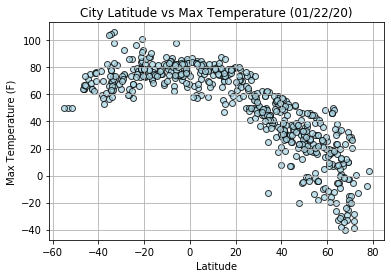

In [24]:
max_temp_list = [x for x in df["Max Temp"]]
latitude = [x for x in df["Lat"]]

plt.scatter(latitude, max_temp_list, marker ="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Max Temperature (01/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/Fig1")

#### Latitude vs. Humidity Plot

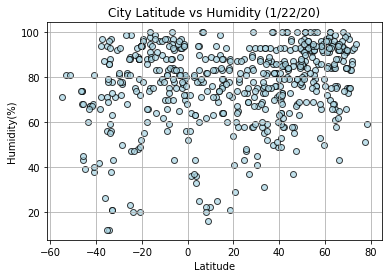

In [26]:
humidity = [x for x in df["Humidity"]]

plt.scatter(latitude, humidity, marker ="o",facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Humidity (1/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../output_data/Fig2")
plt.show()

#### Latitude vs. Cloudiness Plot

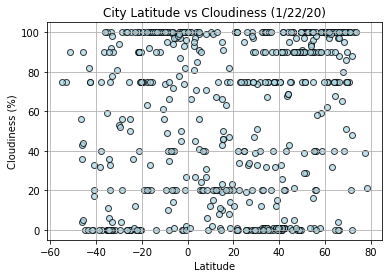

In [27]:
cloudiness = [x for x in df["Cloudiness"]]

plt.scatter(latitude, cloudiness, marker ="o",facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Cloudiness (1/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Fig3")
plt.show()

#### Latitude vs. Wind Speed Plot

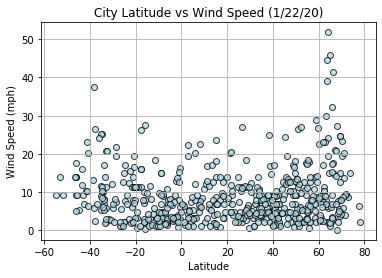

In [30]:
wind_speed = [x for x in df["Wind Speed"]]

plt.scatter(latitude, wind_speed, marker ="o",facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Wind Speed (1/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Fig4")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


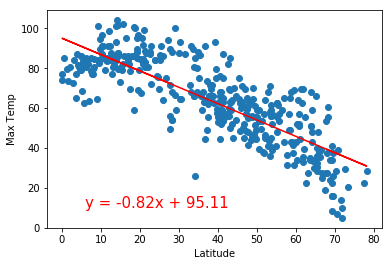

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


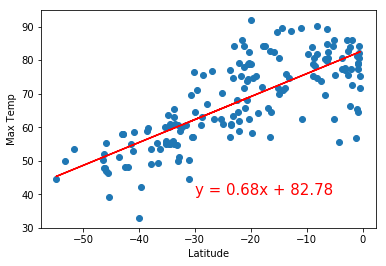

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


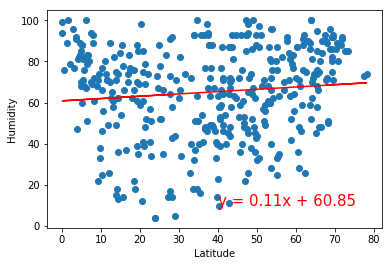

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


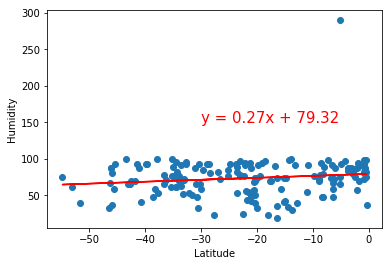

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


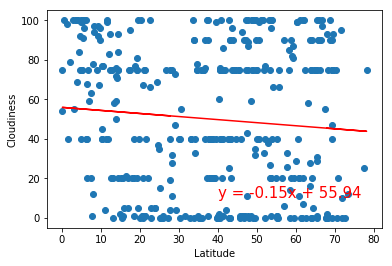

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


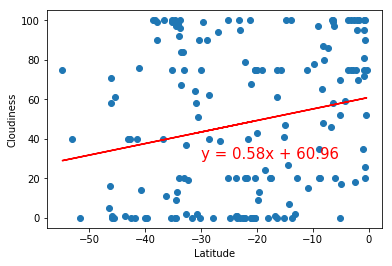

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


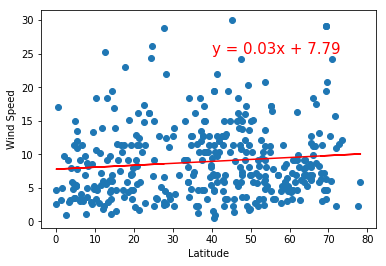

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


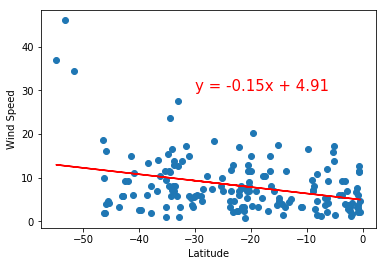